In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [35]:
#reading the data
df = pd.read_csv('/Users/vaishnavishankar/Desktop/Python/titanic_train.csv', sep=',', decimal='.')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.set_index('PassengerId', inplace=True)
#df.shape

In [37]:
#drop columns
df.drop(columns=['Name', 'Ticket', 'Fare', 'Embarked'], inplace=True)
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
dtype: int64

In [38]:
#%of missing
cab_missing = round(df.isnull().sum().Cabin/df.shape[0]*100, 2)
print(f'{cab_missing}%')
df.drop(columns=['Cabin'], inplace=True)

77.1%


In [39]:
#plots
def catplot_count(df, x_variable, hue_variable, i):
    g = sns.countplot(data=df, x=x_variable, hue=hue_variable, color='#abc9ea', palette='pastel', ax=i)
    g.set_ylabel('')
    g.set_xlabel('')
    g.set_title(x_variable)
    for i in g.patches:
        width = i.get_x() + i.get_width()/2
        height = int(i.get_height() + 1)
        g.annotate(i.get_height(), (width, height), ha='center', va='baseline', fontsize=12)

In [40]:
sns.set(rc={'figure.figsize':(12,8)})

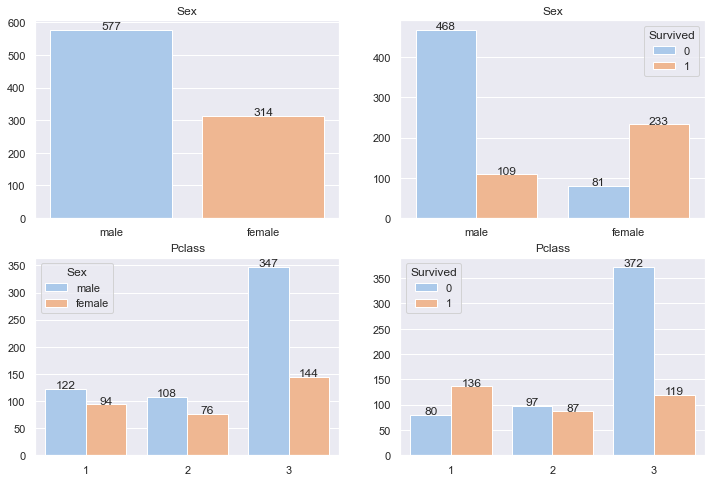

In [41]:
#analyzing categorical variables

f, axes = plt.subplots(2, 2)
catplot_count(df, 'Sex', None, axes[0][0])
catplot_count(df, 'Sex', 'Survived', axes[0][1])
catplot_count(df, 'Pclass', 'Sex', axes[1][0])
catplot_count(df, 'Pclass', 'Survived', axes[1][1])

<AxesSubplot:xlabel='Age', ylabel='Count'>

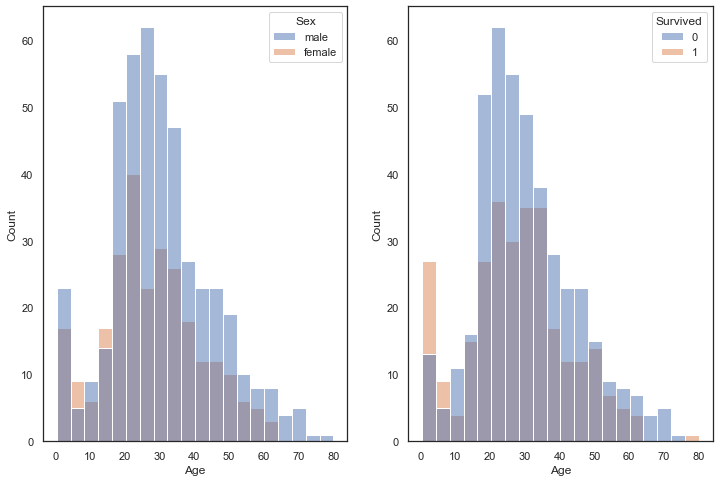

In [42]:
#analyzing continous variables
sns.set_style('white')
f, axes = plt.subplots(1, 2)
sns.histplot(data=df, x='Age', hue='Sex', ax=axes[0])
sns.histplot(data=df, x='Age', hue='Survived', ax=axes[1])

<AxesSubplot:xlabel='Age'>

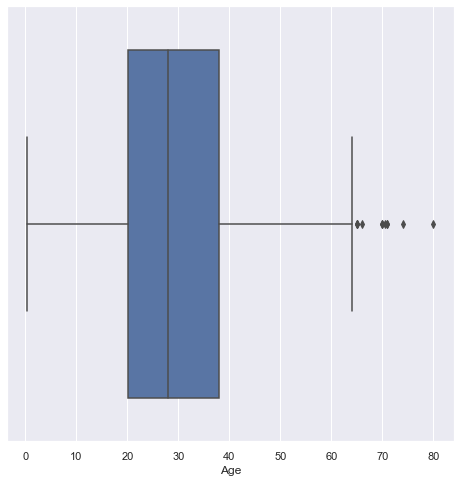

In [43]:
#Age values missing
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(data=df, x='Age')

In [44]:
#Age Mean
male_mean = int(df.loc[df['Sex']=='male', 'Age'].mean())
male_mean

female_mean = int(df.loc[df['Sex']=='female', 'Age'].mean())
female_mean

27

In [45]:
#Age Mode
male_mode = df.loc[df['Sex']=='male', 'Age'].mode()
male_mode

female_mode = df.loc[df['Sex']=='female', 'Age'].mode()
female_mode

0    24.0
dtype: float64

In [46]:
#imputing missing  age values
df_mode = df.fillna(male_mode[1])
df_mode.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,3,male,22.0,1,0
2,1,1,female,38.0,1,0
3,1,3,female,26.0,0,0
4,1,1,female,35.0,1,0
5,0,3,male,35.0,0,0


In [47]:
#Encoding values into 0 and 1
from sklearn.preprocessing import LabelEncoder, RobustScaler
df_mode['Sex'] = LabelEncoder().fit_transform(df_mode['Sex']) 
reshaped_age = np.array(df_mode['Age']).reshape(len(df_mode['Age']), 1)
df_mode['Age'] = RobustScaler().fit_transform(reshaped_age)
df_mode.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,3,1,-0.230769,1,0
2,1,1,0,1.000000,1,0
3,1,3,0,0.076923,0,0
4,1,1,0,0.769231,1,0
5,0,3,1,0.769231,0,0


In [48]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X = df_mode.loc[:, 'Pclass':'Parch']
y = df_mode['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [49]:
#Training the models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
def classifier(model, X_train, X_test, y_train, y_test):
    # Train
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc_score = round(accuracy_score(y_test, y_pred)*100, 2)
    print(f'Accuracy score is: {acc_score}%')
    
    # Confusion Matrix with a heatplot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3,3))
    sns.heatmap(cm, annot=True, linewidths=.5, cmap='YlGnBu')
    
    # Returns the trained model
    return model

Accuracy score is: 82.51%


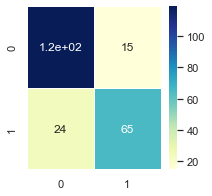

In [51]:
# Supported Vector Machine
svc = SVC()
svc = classifier(svc, X_train, X_test, y_train, y_test)


Accuracy score is: 81.61%


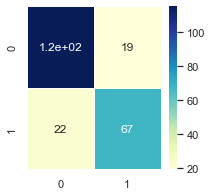

In [52]:
# Logistic Regression
logreg = LogisticRegression()
logreg = classifier(logreg, X_train, X_test, y_train, y_test)

Accuracy score is: 74.44%


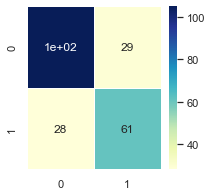

In [53]:
# Decision Tree
tree = DecisionTreeClassifier()
tree = classifier(tree, X_train, X_test, y_train, y_test)

Accuracy score is: 79.37%


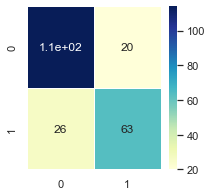

In [54]:
# Random Forest
forest = RandomForestClassifier()
forest = classifier(forest, X_train, X_test, y_train, y_test)

Accuracy score is: 76.23%


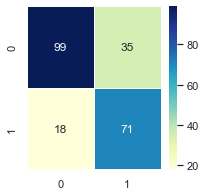

In [55]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb = classifier(gnb, X_train, X_test, y_train, y_test)

In [56]:
#Submission
test_csv = pd.read_csv('/Users/vaishnavishankar/Desktop/Python/titanic_test.csv', decimal='.').set_index('PassengerId')
test_csv.drop(columns=['Name', 'Cabin', 'Ticket', 'Fare', 'Embarked'], inplace=True)
test_csv.fillna(male_mode[1], inplace=True)
test_csv['Sex'] = LabelEncoder().fit_transform(test_csv['Sex'])

In [57]:
reshaped = np.array(test_csv['Age']).reshape(len(test_csv['Age']), 1)
test_csv['Age'] = RobustScaler().fit_transform(reshaped)

In [58]:
test_csv['Survived'] = svc.predict(test_csv)

In [59]:
test_csv.loc[:, 'Survived'].to_csv('./submission.csv', sep=',', decimal='.')